In [ ]:
# Задание 1
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random


f=open("socfb-Pepperdine86.txt")
lines=f.readlines()
out=[]
in_=[]
for x in lines:
    out.append(x.split(' ')[0])
    in_.append(x.split(' ')[1])
f.close()
l=len(out)
N=max(out, key=lambda i: int(i))
M=max(in_, key=lambda i: int(i))
N=int(max(N,M))

E=0
petly=0
vzaimno_obratn=0
B=np.zeros((N,N))
for i in range(l):
        B[int(out[i])-1][int(in_[i])-1]=1
        B[int(in_[i])-1][int(out[i])-1]=1
for i in range(N):
    petly+=B[i][i]
    for j in range(N):
        E+=B[i][j]
        if B[i][j]==1:
            if B[i][j]==B[j][i]:
                vzaimno_obratn+=1
                    
print("Количество узлов =", N)        
print("Количество ребер =", E/2)
print("Количество петель =", petly)
print("Количество взаимно обратных ребер =", vzaimno_obratn/2)  
print()
print("Если сделать орграф")
G =nx.read_edgelist("socfb-Pepperdine86.txt", nodetype=int, create_using=nx.DiGraph)
print("Количество узлов =", G.number_of_nodes())   
print("Количество ребер =", G.number_of_edges())

E=0
petly=0
vzaimno_obratn=0
A=np.zeros((N,N))
for i in range(l):
        A[int(out[i])-1][int(in_[i])-1]=1
for i in range(N):
    petly+=A[i][i]
    for j in range(N):
        E+=A[i][j]
        if A[i][j]==1:
            if A[i][j]==A[j][i]:
                vzaimno_obratn+=1
print("Количество петель =", petly)
print("Количество взаимно обратных ребер =", vzaimno_obratn/2) 


Количество узлов = 3445
Количество ребер = 152007.0
Количество петель = 0.0
Количество взаимно обратных ребер = 152007.0

Если сделать орграф
Количество узлов = 3445
Количество ребер = 152007
Количество петель = 0.0
Количество взаимно обратных ребер = 0.0


In [ ]:
# 1.2
deg_out=np.zeros(N)
deg_in=np.zeros(N)
for i in range(N):
    for j in range(N):
        deg_out[i]+=A[i][j]
        deg_in[i]+=A[j][i]
d_out=0
d_in=0
deg11=0
# deg12=0
deg9=0
for i in range(N):
    if deg_out[i]==0:
        d_out+=1
    if deg_in[i]==0:
        d_in+=1
    if deg_out[i]>10:
        deg11+=1
#     if deg_in[i]>10:
#         deg12+=1
    if deg_out[i]<10:
        deg9+=1
        
# degrees = [val for (node, val) in G.degree()]
# q=0
# w=0
# e=0
# for i in range(N):
#     if degrees[i]==0:
#         q+=1
#     if degrees[i]>10:
#         w+=1
#     if degrees[i]<10:
#         e+=1
        
print("Количество deg_out=0 =", d_out)   
# print("Количество deg_out=0 =", q)  
print("Количество deg_in=0 =", d_in)
print("Количество deg_out>10 =", deg11)
# print("Количество deg_out>10 =", w)
print("Количество deg_out<10 =", deg9) 
# print("Количество deg_out<10 =", e) 

Количество deg_out=0 = 165
Количество deg_in=0 = 173
Количество deg_out>10 = 2445
Количество deg_out<10 = 938


In [ ]:
#Проверка степеней узлов через библиотеку
deg1_out=G.out_degree()
d_out=0
deg11=0
for i in range(N):
  if deg1_out[i+1]==0:
    d_out+=1
  if deg1_out[i+1]>10:
    deg11+=1
print(d_out)
print(deg11)
print(np.trace(B))


165
2445
0.0


Минимальная степень узла =  0.0
Максимальная степень узла =  582.0
Средняя степень узла =  44.123947750362845
Средняя степень узла2 =  44.123947750362845


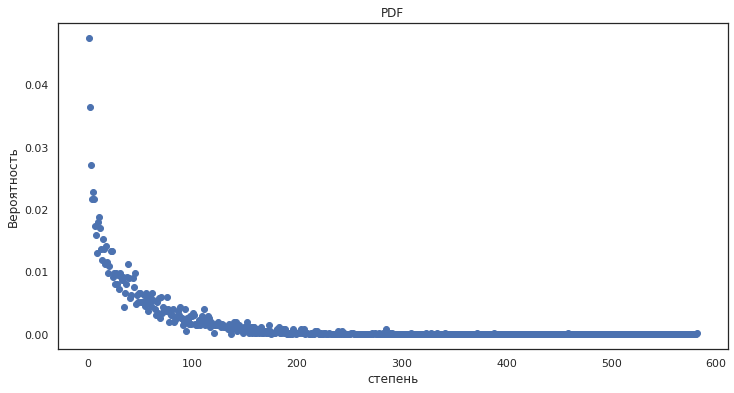

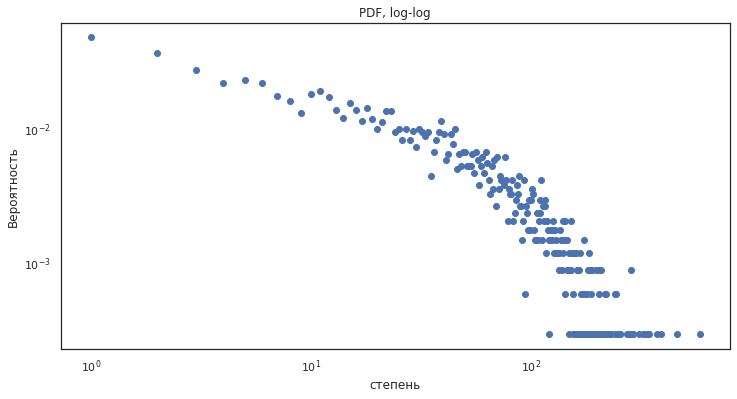

In [ ]:
# 1.8
J=int(np.max(deg_out))
X=np.linspace(1, J, num=J, endpoint=True)
Y=np.zeros(J)
for j in range(int(np.max(deg_out))):
    q=0
    for i in range(N):
        if deg_out[i]==j+1:
            q+=1
    Y[j]=q/N
    
# degrees = [val for (node, val) in G.degree()]
# print("max = ", np.max(degrees))
# Z=nx.degree_histogram(G)

print("Минимальная степень узла = ", np.min(deg_out))
print("Максимальная степень узла = ", np.max(deg_out))
print("Средняя степень узла = ", np.sum(deg_out)/N)
print("Средняя степень узла2 = ", np.sum(deg_out)/N)

fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.scatter(X,Y)
ax.set_xlabel("степень")                             
ax.set_ylabel("Вероятность")                         
ax.set_title("PDF")
plt.show()


fig,cx= plt.subplots() 
fig.set_figwidth(12)
fig.set_figheight(6)
plt.xscale('log')
plt.yscale('log')
cx.loglog(X, Y, 'o')
cx.set_xlabel("степень")                             
cx.set_ylabel("Вероятность")                         
cx.set_title("PDF, log-log")

plt.show()



In [ ]:
#1.3
G = nx.read_edgelist("socfb-Pepperdine86.txt", nodetype=int, create_using=nx.DiGraph)
print("Число компонент сильной связности =", nx.number_strongly_connected_components(G))
print("Число компонент слабой связности =", nx.number_weakly_connected_components(G))
P = max(nx.weakly_connected_components(G), key=len)
S = G.subgraph(P).copy()
print("Количество вершин в компоненте =",S.number_of_nodes())   
print("Количество ребер в компоненте =",S.number_of_edges())
print("Доля ребер в компоненте =", S.number_of_edges()/G.number_of_edges()) 
print("Доля вершин в компоненте =", len(P)/N)   

Число компонент сильной связности = 3445
Число компонент слабой связности = 3
Количество вершин в компоненте = 3440
Количество ребер в компоненте = 152003
Доля ребер в компоненте = 0.9999736854223819
Доля вершин в компоненте = 0.9985486211901307


In [ ]:
#1.5-1.7

deg_out=np.zeros(N)
deg_in=np.zeros(N)
for i in range(N):
    for j in range(N):
        deg_out[i]+=B[i][j]
        deg_in[i]+=B[j][i]

B2=B.dot(B)
B3=B.dot(B2)
trB3=0
for i in range(N):
    trB3+=B3[i][i]

print("Количество треугольников =", trB3/6)
#проверка треугольников
# f=nx.triangles(G)
# D=sum(f.values())
# print(D/3)
# print("Количество треугольников2 =", np.trace(B3)/6)
G =nx.read_edgelist("socfb-Pepperdine86.txt", nodetype=int, create_using=nx.Graph)

def C(n,k):
    if n>=2:
        return(math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    else: 
        return 0

c_i=np.zeros(N)
for i in range(N):
    c_i[i]=nx.clustering(G, i+1) #список локальных кластерных коэффициентов 
  
chisl=0
znamenatel=0
for i in range(N):
    chisl+=C(deg_out[i],2)*c_i[i]
    znamenatel+=C(deg_out[i],2)
    
    
print("Средний кластерный коэффициент =", np.sum(c_i,0)/N)
print("Средний кластерный коэффициент =", nx.average_clustering(G))
print("Глобальный кластерный коэффициент =", chisl/znamenatel)
print("Коэффициент ассортативноти по степени вершин = ",nx.degree_pearson_correlation_coefficient(G))


Количество треугольников = 1587943.0
Средний кластерный коэффициент = 0.2774445445456963
Средний кластерный коэффициент = 0.2774445445456965
Глобальный кластерный коэффициент = 0.20642252758985508
Коэффициент ассортативноти по степени вершин =  0.05550950018032013


In [ ]:
#1.6
P = max(nx.connected_components(G), key=len)
Q = G.subgraph(P).copy()
length_matrix = dict(nx.all_pairs_shortest_path_length(Q))
diameter=nx.diameter(Q)
number_lenght=np.zeros(diameter+1)
procentil=np.zeros((diameter+1,2))
for i in P:
  for j in P:
    if length_matrix[i][j]==0:
      number_lenght[0]=number_lenght[0]+1
    if length_matrix[i][j]==1:
      number_lenght[1]=number_lenght[1]+1
    if length_matrix[i][j]==2:
      number_lenght[2]=number_lenght[2]+1
    if length_matrix[i][j]==3:
      number_lenght[3]=number_lenght[3]+1
    if length_matrix[i][j]==4:
      number_lenght[4]=number_lenght[4]+1
    if length_matrix[i][j]==5:
      number_lenght[5]=number_lenght[5]+1
    if length_matrix[i][j]==6:
      number_lenght[6]=number_lenght[6]+1
    if length_matrix[i][j]==7:
      number_lenght[7]=number_lenght[7]+1
    if length_matrix[i][j]==8:
      number_lenght[8]=number_lenght[8]+1
    if length_matrix[i][j]==9:
      number_lenght[9]=number_lenght[9]+1
number_lenght=[i / 2 for i in number_lenght]
n=np.sum(number_lenght)
number_lenght=[i / n for i in number_lenght]
procentil[0][1]=number_lenght[0]
procentil[0][0]=0
for i in range(1,diameter+1):
  procentil[i][1]=procentil[i-1][1]+number_lenght[i]
  procentil[i][0]=i
for i in range(diameter+1):
  procentil[i][1]=procentil[i][1]*100
i=0
while procentil[i][1]<90:
  i+=1
print("90-процентиль", procentil[i])
print("Радиус наибольшей компоненты связности = ", nx.radius(Q))
print("Диаметр наибольшей компоненты связности =", diameter)

90-процентиль [ 3.         94.19605192]
Радиус наибольшей компоненты связности =  5
Диаметр наибольшей компоненты связности = 9


In [ ]:
# Задание 2
CR = nx.read_edgelist("CA-GrQc.txt", nodetype=int)
N = CR.number_of_nodes() #число узлов
M = CR.number_of_edges()
p = 2*M/(N*(N-1)) #вероятность
GNp=nx.fast_gnp_random_graph(N, p)
WS=nx.watts_strogatz_graph(N,4,0)
degree =  [val for (node, val) in WS.degree()]
while WS.number_of_edges()< M:
  s=random.randint(0,N-1)
  t=random.randint(0,N-1)
  while WS.has_edge(s,t) == True:
    s=random.randint(1,N)
    t=random.randint(1,N)
  WS.add_edge(s,t)
print(M, "=", GNp.number_of_edges(),"=",  WS.number_of_edges() )
degree =  [val for (node, val) in WS.degree()]


14496 = 14637 = 14496


Минимальная степень CR =  1
Минимальная степень GNp =  0
Минимальная степень WS =  4
Максимальная степень CR =  81
Максимальная степень GNp =  17
Максимальная степень WS =  12
Средняя степень CR =  5.530713468141931
Средняя степень GNp =  5.584509729111026
Средняя степень GNp =  5.530713468141931
Средняя степень WS =  5.530713468141931


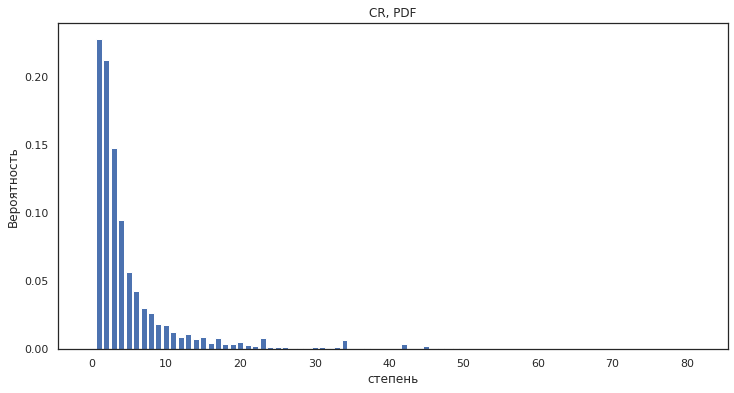

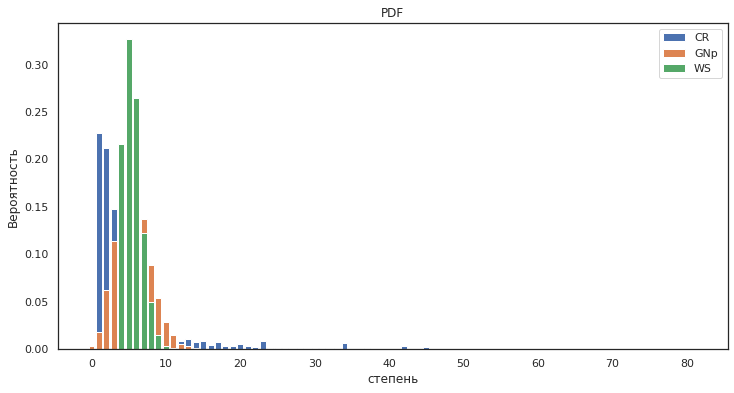

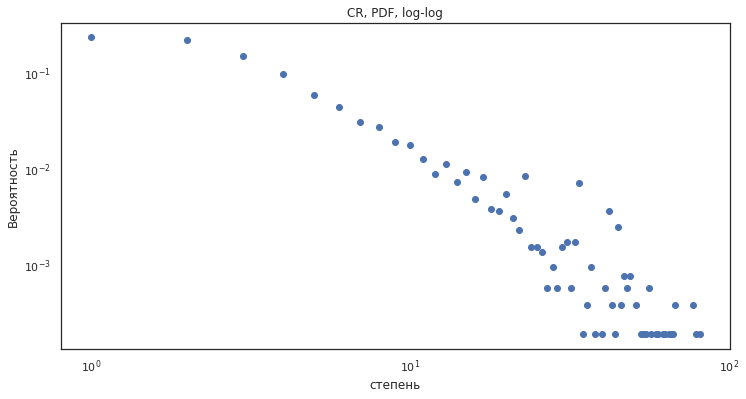

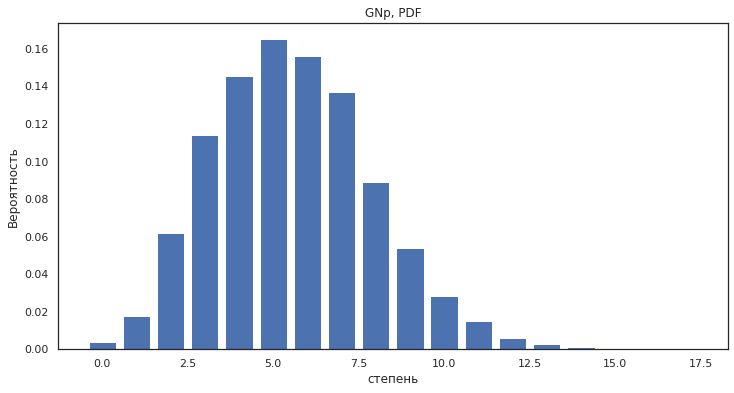

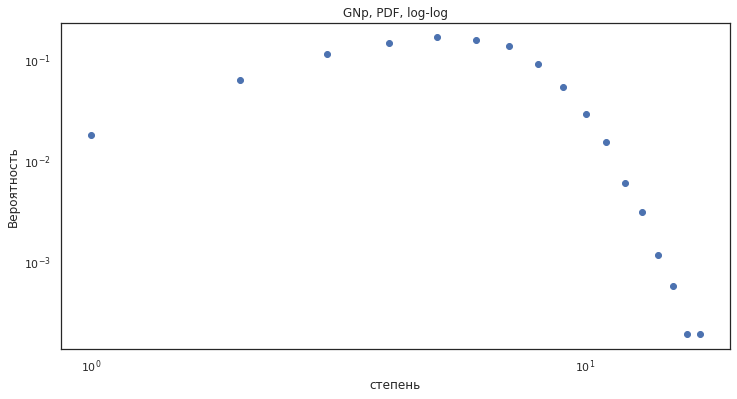

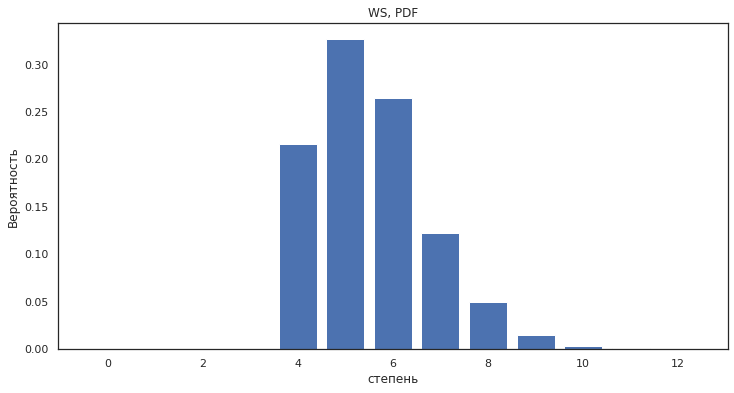

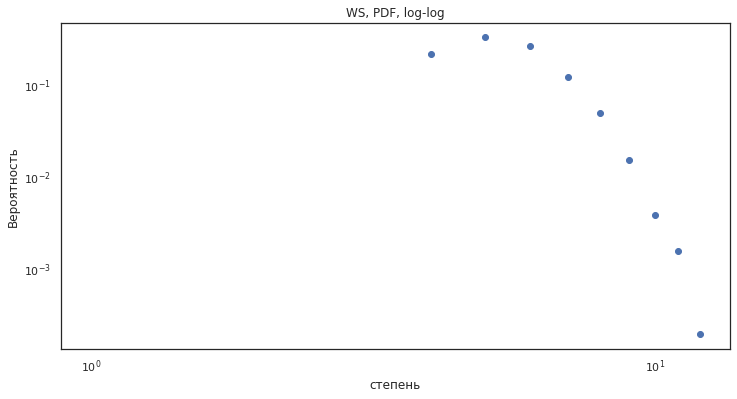

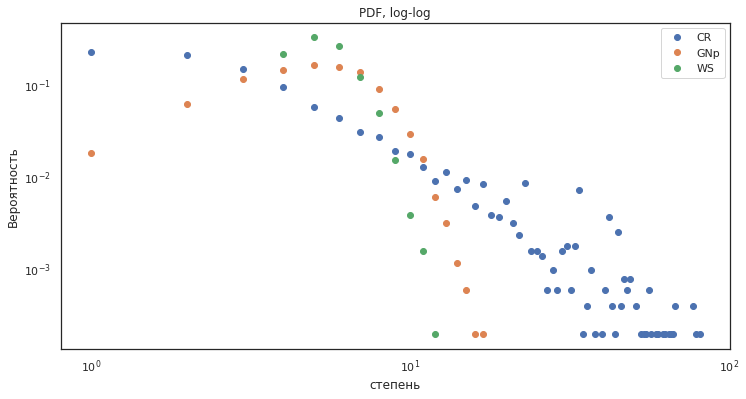

CR


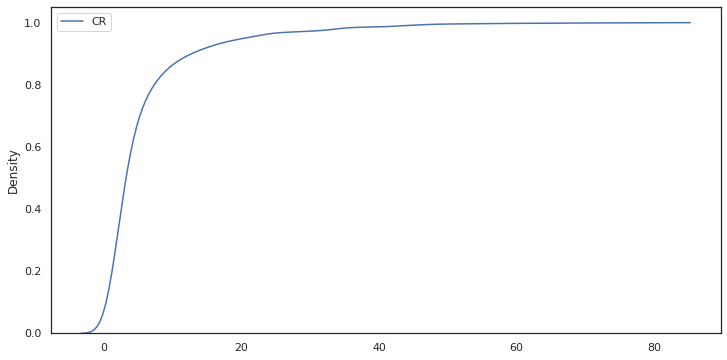

GNp


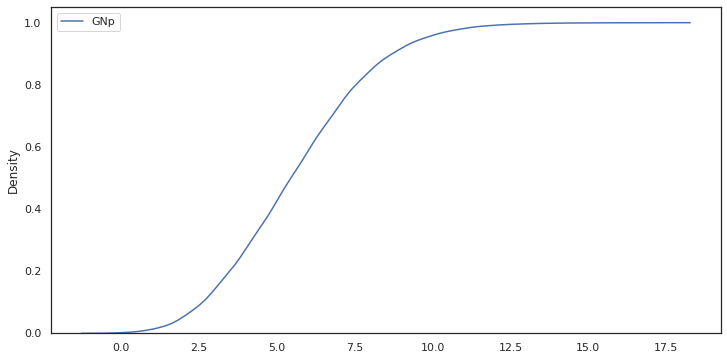

WS


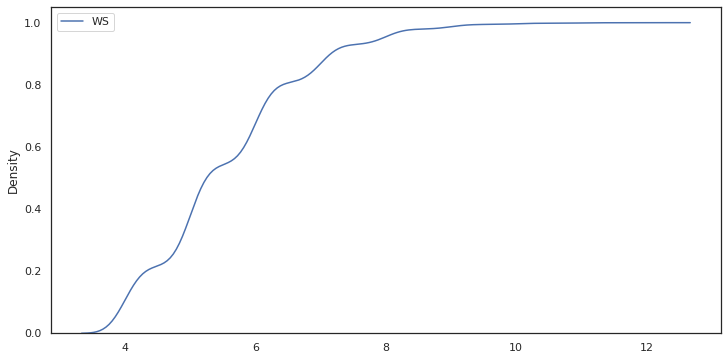

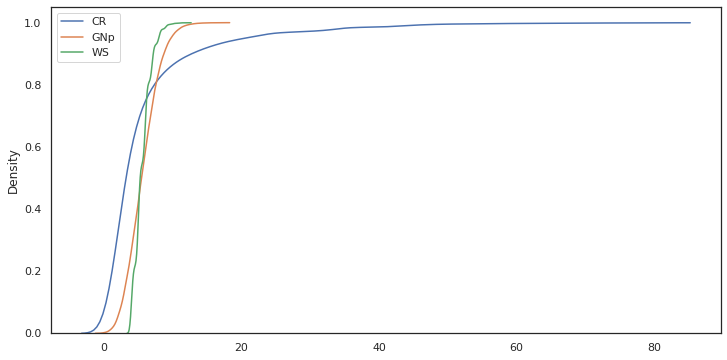

In [ ]:
#2.1
degrees1 = [val for (node, val) in CR.degree()]
degrees2 = [val for (node, val) in GNp.degree()]
degrees3 = [val for (node, val) in WS.degree()]

print("Минимальная степень CR = ", np.min(degrees1))
print("Минимальная степень GNp = ", np.min(degrees2))
print("Минимальная степень WS = ", np.min(degrees3))
print("Максимальная степень CR = ", np.max(degrees1))
print("Максимальная степень GNp = ", np.max(degrees2))
print("Максимальная степень WS = ", np.max(degrees3))

N2=GNp.number_of_nodes()
N3=WS.number_of_nodes()
Y1=nx.degree_histogram(CR)
Y1=[i/N for i in Y1]
Y2=nx.degree_histogram(GNp)
Y2=[i/N2 for i in Y2]
Y3=nx.degree_histogram(WS)
Y3=[i/N3 for i in Y3]

print("Средняя степень CR = ", np.sum(degrees1)/N)
print("Средняя степень GNp = ", np.sum(degrees2)/N2)
print("Средняя степень GNp = ", p*(N2-1))
print("Средняя степень WS = ", np.sum(degrees3)/N3)

J1=len(Y1)
J2=len(Y2)
J3=len(Y3)

X1 = np.linspace(0, J1-1, num=J1, endpoint=True)
X2 = np.linspace(0, J2-1, num=J2, endpoint=True)
X3 = np.linspace(0, J3-1, num=J3, endpoint=True)

sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('white')

fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(X1,Y1)
ax.set_xlabel("степень")                             
ax.set_ylabel("Вероятность")                         
ax.set_title("CR, PDF")
plt.show()

fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(X1,Y1, label='CR')
ax.bar(X2,Y2,label='GNp')
ax.bar(X3,Y3,label='WS')
ax.set_xlabel("степень")                             
ax.set_ylabel("Вероятность")                         
ax.set_title("PDF")
plt.legend()
plt.show()


fig,cx= plt.subplots() 
fig.set_figwidth(12)
fig.set_figheight(6)
cx.loglog(X1, Y1, 'o')
cx.set_xlabel("степень")                             
cx.set_ylabel("Вероятность")                         
cx.set_title("CR, PDF, log-log")

fig, bx= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
bx.bar(X2,Y2)
bx.set_xlabel("степень")                             
bx.set_ylabel("Вероятность")                         
bx.set_title("GNp, PDF")

fig,dx= plt.subplots() 
fig.set_figwidth(12)
fig.set_figheight(6)
dx.loglog(X2, Y2, 'o')
dx.set_xlabel("степень")                             
dx.set_ylabel("Вероятность")                         
dx.set_title("GNp, PDF, log-log")

fig, bx= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
bx.bar(X3,Y3)
bx.set_xlabel("степень")                             
bx.set_ylabel("Вероятность")                         
bx.set_title("WS, PDF")

fig,dx= plt.subplots() 
fig.set_figwidth(12)
fig.set_figheight(6)
dx.loglog(X3, Y3, 'o')
dx.set_xlabel("степень")                             
dx.set_ylabel("Вероятность")                         
dx.set_title("WS, PDF, log-log")
plt.show()
fig, ax= plt.subplots()  
fig.set_figwidth(12)
fig.set_figheight(6)
ax.loglog(X1,Y1, 'o', label='CR')
ax.loglog(X2,Y2, 'o',label='GNp')
ax.loglog(X3,Y3, 'o',label='WS')
ax.set_xlabel("степень")                             
ax.set_ylabel("Вероятность")                         
ax.set_title("PDF, log-log")
plt.legend()
plt.show()

print("CR")
sns.kdeplot(degrees1, cumulative=True, label='CR')
plt.legend()
plt.show()
print("GNp")

sns.kdeplot(degrees2, cumulative=True, label='GNp')
plt.legend()
plt.show()
print("WS")

sns.kdeplot(degrees3, cumulative=True, label='WS')
plt.legend()
plt.show()

sns.kdeplot(degrees1, cumulative=True, label='CR')
sns.kdeplot(degrees2, cumulative=True, label='GNp')
sns.kdeplot(degrees3, cumulative=True, label='WS')
plt.legend()


a= -2.274882282343871 b= 1.1298377327334104


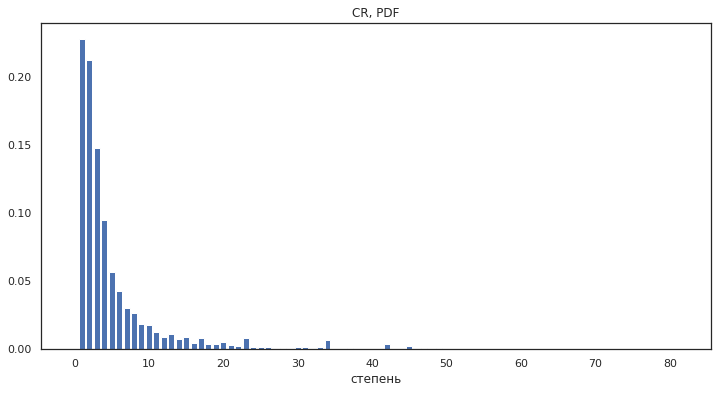

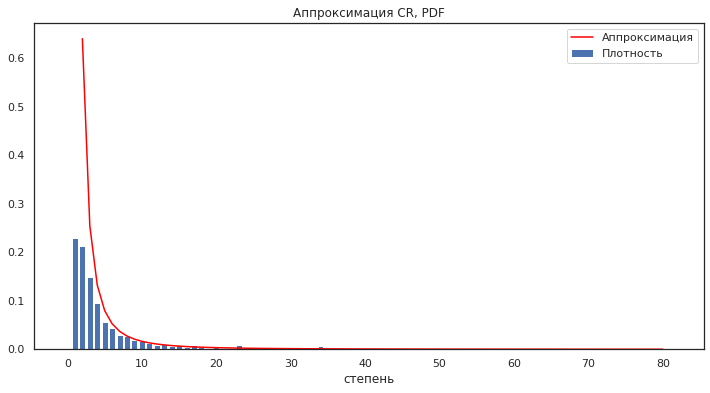

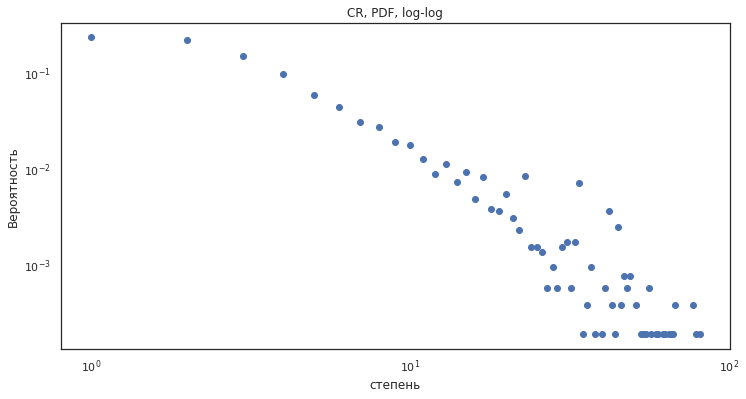

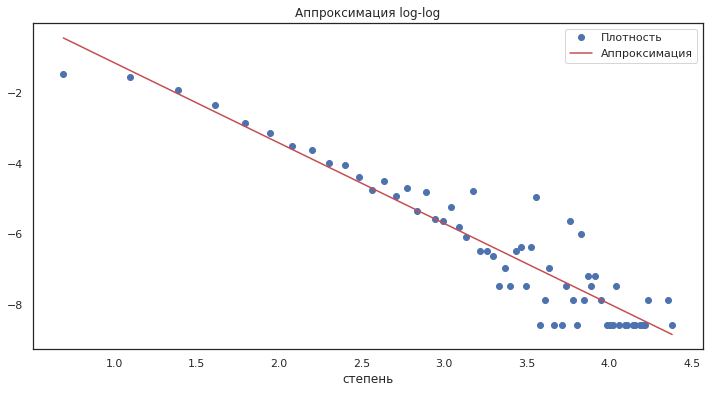

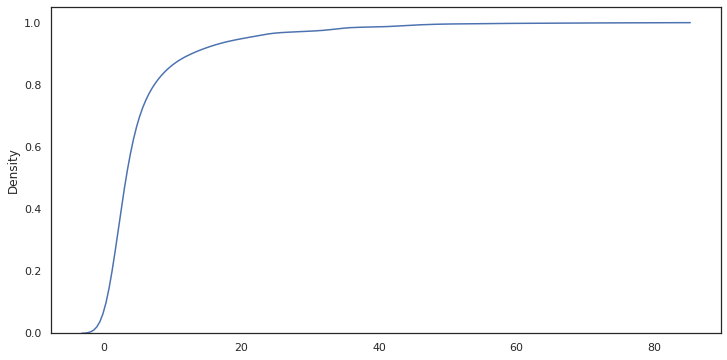

In [ ]:
#2.2
CR = nx.read_edgelist("CA-GrQc.txt", nodetype=int)
N = CR.number_of_nodes() #число узлов
M = CR.number_of_edges()
degrees1 = [val for (node, val) in CR.degree()]
# J1=np.max(degrees1)
Y1=nx.degree_histogram(CR)
Y1=[i / N for i in Y1]
J1=len(Y1)
X1 = np.linspace(0, J1-1, num=J1, endpoint=True)
# X = np.linspace(1, int(np.max(degrees1)), num=int(np.max(degrees1)), endpoint=True)
# Y=np.zeros(int(np.max(degrees1)))
# for j in range(int(np.max(degrees1))):
# q=0
# for i in range(N):
# if degrees1[i]==j+1:
# q+=1
# Y[j]=q/N
k=[]
X2= np.zeros(len(Y1))
Y2= np.zeros(len(Y1))
for i in range(len(X1)):
    if X1[i]==0:
        k.append(i)
    else:
        X2[i]=math.log(X1[i])
X_posle=np.delete(X1, k)
X2=np.delete(X2, k)
Y2=np.delete(Y2, k)

k.clear()
for i in range(len(Y2)):
    if Y1[i]==0:
        k.append(i)
    else:
        Y2[i]=math.log(Y1[i])
X_posle=np.delete(X_posle, k)
X2=np.delete(X2, k)
Y2=np.delete(Y2, k)
k.clear()
# Y2 = np.log(Y1)
A = np.vstack([X2, np.ones(len(X2))]).T
a, b = np.linalg.lstsq(A, Y2, rcond=None)[0]
print("a=", a, "b=", b)

fig, ax= plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(X1,Y1)
ax.set_xlabel("степень")
# ax.set_ylabel("Вероятность")
ax.set_title("CR, PDF")

fig, ax= plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(X1,Y1,label = 'Плотность')
ax.plot(X_posle,math.exp(b)*X_posle**(a),color='red', label = 'Аппроксимация')
# ax.plot(X1,Y3, color='green')
ax.set_xlabel("степень")
# ax.set_ylabel("Вероятность")
ax.set_title("Аппроксимация CR, PDF")
ax.legend()


fig,cx= plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
# plt.xscale('log')
# plt.yscale('log')
cx.loglog(X1, Y1, 'o')
cx.set_xlabel("степень")
cx.set_ylabel("Вероятность")
cx.set_title("CR, PDF, log-log")

fig,dx= plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
# plt.xscale('log')
# plt.yscale('log')
dx.plot(X2, Y2, 'o',label = 'Плотность')
dx.plot(X2, a*X2+b,'r',label = 'Аппроксимация')
dx.set_xlabel("степень")
# dx.set_ylabel("вероятность")
dx.set_title("Аппроксимация log-log")
dx.legend()
plt.show()


sns.kdeplot(degrees1, cumulative=True)

In [ ]:
# 2.3
T1=nx.triangles(CR)
T2=nx.triangles(GNp)
T3=nx.triangles(WS)
D=sum(T1.values())
O = nx.nodes(CR)
c1_i = np.zeros(N)
c2_i = np.zeros(N2)
c3_i = np.zeros(N)
С1 = nx.clustering(CR)
j=0
for i in O:
  c1_i[j]=С1[i] #список локальных кластерных коэффициентов
  j+=1

for i in range(N):  
  c3_i[i]=nx.clustering(WS, i) 
for i in range(N2):
  c2_i[i]=nx.clustering(GNp, i)
   
chisl1=0
znamenatel1=0
chisl2=0
znamenatel2=0
chisl3=0
znamenatel3=0
for i in range(N):
    chisl1+=C(degrees1[i],2)*c1_i[i]
    znamenatel1+=C(degrees1[i],2)
    chisl3+=C(degrees3[i],2)*c3_i[i]
    znamenatel3+=C(degrees3[i],2)
for i in range(N2):  
    chisl2+=C(degrees2[i],2)*c2_i[i]
    znamenatel2+=C(degrees2[i],2)
   
print("Число треугольников CR = ", sum(T1.values())/3)
print("Число треугольников GNp = ", sum(T2.values())/3)
print("Число треугольников WS = ", sum(T3.values())/3)
print("Средний кластерный коэффициент CR = ", nx.average_clustering(CR))
print("Средний кластерный коэффициент GNp = ", nx.average_clustering(GNp))
print("Средний кластерный коэффициент WS = ", nx.average_clustering(WS))
print("Глобальный кластерный коэффициент CR = ", chisl1/znamenatel1)
print("Глобальный кластерный коэффициент GNp = ",chisl2/znamenatel2)
print("Глобальный кластерный коэффициент WS = ",chisl3/znamenatel3)


Число треугольников CR =  48260.0
Число треугольников GNp =  34.0
Число треугольников WS =  5250.0
Средний кластерный коэффициент CR =  0.529635811052136
Средний кластерный коэффициент GNp =  0.0011090863437296088
Средний кластерный коэффициент WS =  0.28376999129574154
Глобальный кластерный коэффициент CR =  0.6296075791281005
Глобальный кластерный коэффициент GNp =  0.001250582379049067
Глобальный кластерный коэффициент WS =  0.22598464739220891


In [ ]:
# Задание 3
#3.1
S = nx.read_edgelist("socfb-Pepperdine86.txt", nodetype=int, create_using=nx.DiGraph)
P = max(nx.weakly_connected_components(S), key=len)
G = S.subgraph(P).copy()
G = nx.to_undirected(G)  # преобразовываем в неориентированный
# degree = nx.degree_centrality(G)
length = dict(nx.all_pairs_shortest_path_length(G))
degree_centrality = list(sorted(nx.degree_centrality(G).items(), key=lambda x: x[1],  reverse=True))
closeness_centrality = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1],  reverse=True)
eigenvector_centrality = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1],  reverse=True)
betweenness_centrality = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1],  reverse=True)
decay_centrality1 = np.zeros((N, 2))
delta1=0.25
decay_centrality2 = np.zeros((N, 2))
delta2=0.5
decay_centrality3 = np.zeros((N, 2))
delta3=0.75
for i in list(P):
    sum1=0
    sum2=0
    sum3=0
    decay_centrality1[i-1][0]=i
    decay_centrality2[i-1][0]=i
    decay_centrality3[i-1][0]=i
    for j in list(P):  
        sum1+=delta1**length[i][j]
        sum2+=delta2**length[i][j]
        sum3+=delta3**length[i][j]
    decay_centrality1[i-1][1] = sum1-1
    decay_centrality2[i-1][1]= sum2-1
    decay_centrality3[i-1][1] = sum3-1
decay_centrality1 = sorted(decay_centrality1, key=lambda x: x[1],  reverse=True)
decay_centrality2 = sorted(decay_centrality2, key=lambda x: x[1],  reverse=True)
decay_centrality3 = sorted(decay_centrality3, key=lambda x: x[1],  reverse=True)


In [ ]:
#3.2
S = nx.read_edgelist("socfb-Pepperdine86.txt", nodetype=int, create_using=nx.DiGraph)
P = max(nx.weakly_connected_components(S), key=len)
G = S.subgraph(P).copy()
pagerank = np.zeros(N)
hub = np.zeros(N)
autorities = np.zeros(N)
h, a = nx.hits(G)
pagerank = sorted(nx.pagerank_numpy(G).items(), key=lambda x: x[1],  reverse=True)
hub = sorted(h.items(), key=lambda x: x[1],  reverse=True)
autorities = sorted(a.items(), key=lambda x: x[1],  reverse=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  if __name__ == '__main__':


In [ ]:
#3.3
print("Центральности по степени ",[degree_centrality[x][0] for x in range(15)])
print()
print("Центральности по близости ",[closeness_centrality[x][0] for x in range(15)])
print()
print("Центральности по посредничеству ",[betweenness_centrality[x][0] for x in range(15)])
print()
print("Центральности по собственному вектору ",[eigenvector_centrality[x][0] for x in range(15)])
print()
print("Decay centrality delta=0.25 ",[decay_centrality1[x][0] for x in range(15)])
print()
print("Decay centrality delta=0.5 ",[decay_centrality2[x][0] for x in range(15)])
print()
print("Decay centrality delta=0.75 ",[decay_centrality3[x][0] for x in range(15)])
print()
print("Page Rank ",[pagerank[x][0] for x in range(15)])
print()
print("Hub ",[hub[x][0] for x in range(15)])
print()
print("Autorities ",[autorities[x][0] for x in range(15)])


Центральности по степени  [2978, 354, 461, 1950, 331, 3338, 238, 2203, 2347, 1041, 3087, 877, 1265, 3425, 2032]

Центральности по близости  [354, 2978, 461, 3338, 331, 238, 3087, 1041, 1265, 2032, 877, 1950, 1625, 1558, 2347]

Центральности по посредничеству  [354, 2032, 2203, 2978, 3338, 877, 238, 1041, 854, 461, 331, 1950, 1265, 3089, 1915]

Центральности по собственному вектору  [2978, 331, 461, 1950, 3425, 2347, 238, 3338, 675, 1041, 3100, 559, 3087, 354, 3059]

Decay centrality delta=0.25  [2978.0, 354.0, 461.0, 1950.0, 331.0, 3338.0, 238.0, 1041.0, 3087.0, 2347.0, 877.0, 1265.0, 2032.0, 3425.0, 3100.0]

Decay centrality delta=0.5  [2978.0, 354.0, 461.0, 3338.0, 331.0, 1950.0, 238.0, 1041.0, 3087.0, 877.0, 1265.0, 2032.0, 2347.0, 1625.0, 1558.0]

Decay centrality delta=0.75  [354.0, 2978.0, 461.0, 3338.0, 331.0, 238.0, 1041.0, 1950.0, 3087.0, 1265.0, 877.0, 2032.0, 2347.0, 1625.0, 1558.0]

Page Rank  [20, 11, 23, 17, 21, 56, 64, 30, 6, 37, 16, 12, 2, 14, 53]

Hub  [2978, 3425, 333